In [ ]:
#Load libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from scipy import stats
from sklearn.metrics import mutual_info_score
import scipy.stats as ss
from scipy.stats import chi2_contingency
from itertools import combinations

In [ ]:
#Load dataframe
data=pd.read_csv("vehicles_red.csv")

# Configuración que permite mostrar todas las columnas
pd.set_option('display.max_columns', None)

# Visualizar las primeras filas del dataset omitiendo las filas que tienen más de un NaN
data.dropna(thresh=data.shape[1] - 1).head(5)

,id,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,county,state,lat,long,posting_date
126,7305672709,auburn,0,2018.0,chevrolet,express cargo van,like new,6 cylinders,gas,68472.0,clean,automatic,1GCWGAFP8J1309579,rwd,full-size,van,white,NaN,al,31.425091,-85.617723,2021-04-12T11:20:35-0500
127,7305672266,auburn,0,2019.0,chevrolet,express cargo van,like new,6 cylinders,gas,69125.0,clean,automatic,1GCWGAFP4K1214373,rwd,full-size,van,white,NaN,al,31.425091,-85.617723,2021-04-12T11:20:00-0500
128,7305672252,auburn,0,2018.0,chevrolet,express cargo van,like new,6 cylinders,gas,66555.0,clean,automatic,1GCWGAFPXJ1337903,rwd,full-size,van,white,NaN,al,31.425091,-85.617723,2021-04-12T11:19:58-0500
215,7316482063,birmingham,4000,2002.0,toyota,echo,excellent,4 cylinders,gas,155000.0,clean,automatic,JTDBT123520243495,fwd,compact,sedan,blue,NaN,al,33.913500,-84.685900,2021-05-03T17:48:17-0500
219,7316429417,birmingham,2500,1995.0,bmw,525i,fair,6 cylinders,gas,110661.0,clean,automatic,WBAHD6322SGK86772,rwd,mid-size,sedan,white,NaN,al,33.353800,-86.825400,2021-05-03T16:03:27-0500


In [ ]:
data.shape

(426880, 22)

# Information about columns

**Information about columns**

- **id**: Unique identifier number for the record. Each record refers to a vehicle, and its ID is unique across the entire dataset.  
- **region**: U.S. region where the vehicle is being sold.  
- **price**: Sale price (our target variable).  
- **year**: Year the vehicle was manufactured.  
- **manufacturer**: Manufacturer.  
- **model**: Model.  
- **condition**: Condition of the vehicle.  
- **cylinders**: Number of engine cylinders.  
- **fuel**: Type of fuel the vehicle uses.  
- **odometer**: Vehicle mileage since manufacture.  
- **title_status**: Legal status of the vehicle.  
- **transmission**: Type of transmission the vehicle uses.  
- **VIN**: Vehicle Identification Number.  
- **drive**: Type of drivetrain.  
- **size**: Size.  
- **type**: Body type.  
- **paint_color**: Vehicle's paint color.  
- **state**: U.S. state where the vehicle is being sold.  
- **lat**: GPS latitude coordinate.  
- **long**: GPS longitude coordinate.  
- **posting_date**: Date and time the sales listing was posted in the last 30 days.  


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 22 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            426880 non-null  int64  
 1   region        426880 non-null  object 
 2   price         426880 non-null  int64  
 3   year          425675 non-null  float64
 4   manufacturer  409234 non-null  object 
 5   model         421603 non-null  object 
 6   condition     252776 non-null  object 
 7   cylinders     249202 non-null  object 
 8   fuel          423867 non-null  object 
 9   odometer      422480 non-null  float64
 10  title_status  418638 non-null  object 
 11  transmission  424324 non-null  object 
 12  VIN           265838 non-null  object 
 13  drive         296313 non-null  object 
 14  size          120519 non-null  object 
 15  type          334022 non-null  object 
 16  paint_color   296677 non-null  object 
 17  county        0 non-null       float64
 18  stat

We have a total of **22 variables** (including the target variable **price**) and a total of **426,880 records**. This is a considerable volume for conducting a thorough analysis.

Regarding data types, we see that almost all variables are categorical (or at least Python automatically categorizes them as such based on their data type), except...
- **id**  
- **price**  
- **year**  
- **odometer**  
- **county**  
- **lat**  
- **long**

## Table of null values

## General stats

In [ ]:
data.describe(include="all")

,id,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,county,state,lat,long,posting_date
count,4.268800e+05,426880,4.268800e+05,425675.000000,409234,421603,252776,249202,423867,4.224800e+05,418638,424324,265838,296313,120519,334022,296677,0.0,426880,420331.000000,420331.000000,426812
unique,NaN,404,NaN,NaN,42,29667,6,8,5,NaN,6,3,118264,3,4,13,12,NaN,51,NaN,NaN,381536
top,NaN,columbus,NaN,NaN,ford,f-150,good,6 cylinders,gas,NaN,clean,automatic,1FMJU1JT1HEA52352,4wd,full-size,sedan,white,NaN,ca,NaN,NaN,2021-04-23T22:13:05-0400
freq,NaN,3608,NaN,NaN,70985,8009,121456,94169,356209,NaN,405117,336524,261,131904,63465,87056,79285,NaN,50614,NaN,NaN,12
mean,7.311487e+09,NaN,7.519903e+04,2011.235191,NaN,NaN,NaN,NaN,NaN,9.804333e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,38.493940,-94.748599,NaN
std,4.473170e+06,NaN,1.218228e+07,9.452120,NaN,NaN,NaN,NaN,NaN,2.138815e+05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.841533,18.365462,NaN
min,7.207408e+09,NaN,0.000000e+00,1900.000000,NaN,NaN,NaN,NaN,NaN,0.000000e+00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-84.122245,-159.827728,NaN
25%,7.308143e+09,NaN,5.900000e+03,2008.000000,NaN,NaN,NaN,NaN,NaN,3.770400e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,34.601900,-111.939847,NaN
50%,7.312621e+09,NaN,1.395000e+04,2013.000000,NaN,NaN,NaN,NaN,NaN,8.554800e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,39.150100,-88.432600,NaN
75%,7.315254e+09,NaN,2.648575e+04,2017.000000,NaN,NaN,NaN,NaN,NaN,1.335425e+05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,42.398900,-80.832039,NaN


In [ ]:
import folium
from folium.plugins import MarkerCluster
import pandas as pd
from IPython.display import display

# Agrupar los datos por región
region_info = data.groupby('region').agg(
    cantidad_vehiculos=('region', 'size'),
    precio_promedio=('price', 'mean'),
    antigüedad_promedio=('year', 'mean'),
    marcas=('manufacturer', lambda x: ', '.join(x.dropna().astype(str).unique()))
).reset_index()

# Crear una copia de tu DataFrame para no modificar el original
data_copy = data.copy()

# Eliminar espacios en los nombres de las columnas (si los hubiera)
data_copy.columns = data_copy.columns.str.strip()

# Crear el mapa base (ajustar la ubicación inicial y el nivel de zoom)
m = folium.Map(location=[20.0, -50.0], zoom_start=6)

# Crear el Cluster de Marcadores
marker_cluster = MarkerCluster().add_to(m)

# Iterar sobre las regiones en el DataFrame original para obtener las coordenadas
for _, row in region_info.iterrows():
    # Filtrar el DataFrame original para obtener la fila con las coordenadas para esta región
    region_data = data_copy[data_copy['region'] == row['region']].dropna(subset=['lat', 'long'])

    if not region_data.empty:
        # Tomar la primera fila con coordenadas no nulas
        lat = region_data.iloc[0]['lat']
        lon = region_data.iloc[0]['long']

        # Crear el popup con la información agregada
        popup_text = f"""
        <b>Región:</b> {row['region']}<br>
        <b>Cantidad de Vehículos:</b> {row['cantidad_vehiculos']}<br>
        <b>Precio Promedio:</b> ${row['precio_promedio']:.2f}<br>
        <b>Antigüedad Promedio:</b> {2025 - row['antigüedad_promedio']:.1f} años<br>
        <b>Marcas:</b> {row['marcas']}
        """

        # Crear el marcador con las coordenadas obtenidas
        folium.Marker(
            location=[lat, lon],
            popup=popup_text,
            icon=folium.Icon(color='blue', icon='info-sign')
        ).add_to(marker_cluster)

# Mostrar el mapa
display(m)


# Categorical Variable Analysis

In [ ]:
# Identificar las variables categóricas
category_columns = data.select_dtypes(include=['object', 'category']).columns
print("Variables categóricas: ", category_columns.values)

# Calcular la cardinalidad de cada columna
cardinalities = data[category_columns].nunique()
print('\n',cardinalities.sort_values(ascending=False))

Variables categóricas:  ['region' 'manufacturer' 'model' 'condition' 'cylinders' 'fuel'
 'title_status' 'transmission' 'VIN' 'drive' 'size' 'type' 'paint_color'
 'state' 'posting_date']

 posting_date    381536
VIN             118264
model            29667
region             404
state               51
manufacturer        42
type                13
paint_color         12
cylinders            8
condition            6
title_status         6
fuel                 5
size                 4
drive                3
transmission         3
dtype: int64


Categorical variable visualization

In [ ]:
import plotly.express as px
import pandas as pd

# Crear un DataFrame con la información agregada por región
region_info = data.groupby('region').agg(
    cantidad_vehiculos=('region', 'size'),
    precio_promedio=('price', 'mean'),
    antigüedad_promedio=('year', 'mean')
).reset_index()

# Crear el Treemap
fig = px.treemap(region_info,
                 path=['region'],  # Aquí defines la jerarquía, en este caso solo por región
                 values='cantidad_vehiculos',  # Tamaño del bloque por cantidad de vehículos
                 color='precio_promedio',  # Color por precio promedio
                 hover_data={'region': True, 'cantidad_vehiculos': True, 'precio_promedio': True, 'antigüedad_promedio': True},  # Datos al pasar el mouse
                 color_continuous_scale='Viridis',  # Escala de color para el precio
                 title='Vehicle Treemap by Region')

# Mostrar el gráfico
fig.show()


In [ ]:
import plotly.express as px
import pandas as pd

# Crear un DataFrame con la información agregada por marca
marca_info = data.groupby('manufacturer').agg(
    cantidad_vehiculos=('manufacturer', 'size'),
    precio_promedio=('price', 'mean')
).reset_index()

# Crear el Treemap
fig = px.treemap(marca_info,
                 path=['manufacturer'],  # Jerarquía solo por marca
                 values='cantidad_vehiculos',  # Tamaño del bloque por cantidad de vehículos
                 color='precio_promedio',  # Color por precio promedio
                 hover_data={'manufacturer': True, 'cantidad_vehiculos': True, 'precio_promedio': True},  # Datos al pasar el mouse
                 color_continuous_scale='Viridis',  # Escala de color para el precio
                 title='Vehicle Treemap by Brand and Average Price')

# Mostrar el gráfico
fig.show()


In [ ]:
import plotly.express as px
import pandas as pd

# Agrupar la información por marca
marca_info = data.groupby('model').agg(
    cantidad_vehiculos=('model', 'size'),
    precio_promedio=('price', 'mean')
).reset_index()

# Seleccionar las 100 marcas con más vehículos
top_100_marca = marca_info.nlargest(100, 'cantidad_vehiculos')

# Crear el Treemap
fig = px.treemap(top_100_marca,
                 path=['model'],  # Jerarquía solo por marca
                 values='cantidad_vehiculos',  # Tamaño del bloque por cantidad de vehículos
                 color='precio_promedio',  # Color por precio promedio
                 hover_data={'model': True, 'cantidad_vehiculos': True, 'precio_promedio': True},  # Datos al pasar el mouse
                 color_continuous_scale='Viridis',  # Escala de color para el precio
                 title='Treemap de Vehículos por Marca y Precio Promedio')

# Mostrar el gráfico
fig.show()



In [ ]:
import plotly.express as px
import pandas as pd

# Lista de columnas para las cuales generaremos el Treemap
columnas = ['condition', 'cylinders', 'fuel', 'odometer', 'title_status', 'transmissio', 'drive', 'size', 'type', 'paint_color']

# Crear un Treemap para cada una de las columnas en la lista
for columna in columnas:
    # Agrupar por la columna y calcular la cantidad de vehículos y el precio promedio
    treemap_info = data.groupby(columna).agg(
        cantidad_vehiculos=(columna, 'size'),
        precio_promedio=('price', 'mean')
    ).reset_index()

    # Crear el Treemap
    fig = px.treemap(treemap_info,
                     path=[columna],  # Jerarquía solo por la columna actual
                     values='cantidad_vehiculos',  # Tamaño del bloque por cantidad de vehículos
                     color='precio_promedio',  # Color por precio promedio
                     hover_data={columna: True, 'cantidad_vehiculos': True, 'precio_promedio': True},  # Datos al pasar el mouse
                     color_continuous_scale='Viridis',  # Escala de color para el precio
                     title=f'Treemap de Vehículos por {columna.capitalize()}')

    # Mostrar el gráfico
    fig.show()


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 22 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            426880 non-null  int64  
 1   region        426880 non-null  object 
 2   price         426880 non-null  int64  
 3   year          425675 non-null  float64
 4   manufacturer  409234 non-null  object 
 5   model         421603 non-null  object 
 6   condition     252776 non-null  object 
 7   cylinders     249202 non-null  object 
 8   fuel          423867 non-null  object 
 9   odometer      422480 non-null  float64
 10  title_status  418638 non-null  object 
 11  transmission  424324 non-null  object 
 12  VIN           265838 non-null  object 
 13  drive         296313 non-null  object 
 14  size          120519 non-null  object 
 15  type          334022 non-null  object 
 16  paint_color   296677 non-null  object 
 17  county        0 non-null       float64
 18  stat

To streamline our calculations a bit, we are going to remove some columns from the dataset that, after understanding their content and for various reasons, we’ve determined do not contribute to our project. Here, we are applying our own judgment and, although this is more typically a step from the Data Preparation phase, trimming down the dataset slightly will help us reduce resource usage and avoid processing unnecessary columns. Therefore, we are removing:

**county**:  since it doesn't contain a single non-null value.

**lat and long**: these provide the specific geographic coordinates of the vehicle's sale location. However, we already have information on region and state, and unless we plan to perform very advanced geospatial analysis, these are likely not relevant. Plus, we can always retrieve them later if necessary.

**id**: we already have an index or unique identifier in our pandas DataFrame. This field doesn’t add anything meaningful to the project — it’s more related to database structure than to the vehicle itself.

**VIN**: the vehicle identification number also doesn’t provide any useful information for our purposes. It’s similar to the id column, though in this case it’s a legal identifier used for official vehicle registration. Furthermore, about half of its values are missing.

**posting_date**: this column indicates the date the ad was posted within the last 30 days, and it doesn’t seem particularly relevant to our target variable. Therefore, we’ll remove it.

However, the year variable is important, as it indicates the manufacture year of the vehicle, which is clearly relevant when it comes to pricing

In [ ]:
# Elimnar columnas irelevantes persistiendo el cambio en el dataframe original
data.drop(columns=['county','lat','long','id','VIN','posting_date'], inplace=True)

Now we are going to move on to studying the categorical variables. We'll start by analyzing the cardinality of these variables — that is, we'll look at how many unique categories each categorical variable has.

In [ ]:
# Identificar las variables categóricas
category_columns = data.select_dtypes(include=['object', 'category']).columns
print("Variables categóricas: ", category_columns.values)

# Calcular la cardinalidad de cada columna
cardinalities = data[category_columns].nunique()
print('\n',cardinalities.sort_values(ascending=False))

Variables categóricas:  ['region' 'manufacturer' 'model' 'condition' 'cylinders' 'fuel'
 'title_status' 'transmission' 'drive' 'size' 'type' 'paint_color' 'state']

 model           29667
region            404
state              51
manufacturer       42
type               13
paint_color        12
cylinders           8
condition           6
title_status        6
fuel                5
size                4
drive               3
transmission        3
dtype: int64


First on the list is a variable that is purely categorical by definition: model. Even though there may be many different models, they are still considered categories. It’s true that the number of categories is so high that in many cases, this variable will contribute very little. If we divide the total number of records by the number of categories in this variable, we get an average of 14 records per category. That means each category has very little representation.

Therefore, initially, we will leave this variable out, and if we later consider it necessary, we can bring it back into the analysis. Moreover, since we have the manufacturer variable — which essentially groups the models into fewer categories — we can begin our analysis with that.

A similar situation arises with the region and state variables. The former provides a much more detailed view than the latter by identifying specific regions within U.S. states. Again, if we later determine that the geographical component offered by region adds value, we can include it at that time.

So, for now, we’re going to work with categorical variables that have fewer than 60 categories as a first step. The first thing we’ll do is analyze the frequency of the categories for each variable. To do that, we’ll prepare a table like the one below:

In [ ]:
# Identificar las variables categóricas con menos de 60 categorías
categorical_cols_reduced = cardinalities[cardinalities < 60].index
print("Variables categóricas: ", categorical_cols_reduced.values)

for column in categorical_cols_reduced:
    print(f"\nFrecuencia de la columna {column}:")
    print(data[column].value_counts())

Variables categóricas:  ['manufacturer' 'condition' 'cylinders' 'fuel' 'title_status'
 'transmission' 'drive' 'size' 'type' 'paint_color' 'state']

Frecuencia de la columna manufacturer:
manufacturer
ford               70985
chevrolet          55064
toyota             34202
honda              21269
nissan             19067
jeep               19014
ram                18342
gmc                16785
bmw                14699
dodge              13707
mercedes-benz      11817
hyundai            10338
subaru              9495
volkswagen          9345
kia                 8457
lexus               8200
audi                7573
cadillac            6953
chrysler            6031
acura               5978
buick               5501
mazda               5427
infiniti            4802
lincoln             4220
volvo               3374
mitsubishi          3292
mini                2376
pontiac             2288
rover               2113
jaguar              1946
porsche             1384
mercury             1184


Except for the manufacturer variable — where there are 5 or 6 categories with fewer than 100 records — the rest of the variables' categories each have more than 200 records, and therefore, to a greater or lesser extent, can be considered represented in the dataset. That said, ideally, each category would have at least 1,000 records.

If this turns out to be a problem, given the relevance of the variable, a recategorization could be applied by grouping the less frequent categories into a single "Other" category. The downside is that this approach results in the loss of specific information from those categories. For now, we will leave them as they are and monitor whether transformation becomes necessary later on.

Next, the first thing we will do is analyze the relationships between all the categorical variables using Cramér’s V coefficient. This coefficient is the categorical equivalent of correlation, used to measure the association between two categorical variables.

We will create a function that calculates the coefficient from a contingency table passed as an argument. Then, we’ll build a Cramér’s V matrix, structured just like a standard correlation matrix but using this other statistic. This way, we’ll be able to see the relationships between variable pairs and identify which are more independent from one another.

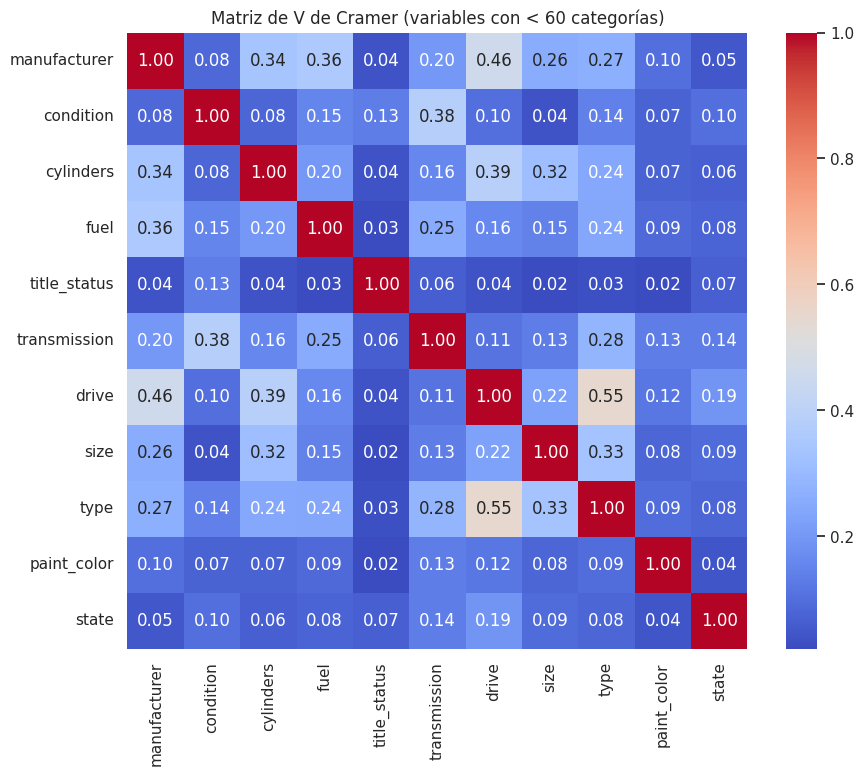

In [ ]:
# Función para calcular V de Cramér
def cramers_v(confusion_matrix):
    chi2, p, dof, expected = chi2_contingency(confusion_matrix)
    n = confusion_matrix.sum().sum()  # Número total de observaciones
    k = min(confusion_matrix.shape)  # Número de categorías en la variable
    return np.sqrt(chi2 / (n * (k - 1)))

# Crear una matriz vacía para almacenar los valores de V de Cramer
matrix = pd.DataFrame(index=categorical_cols_reduced, columns=categorical_cols_reduced)

# Calcular V de Cramer para cada par de variables categóricas
for var1, var2 in combinations(categorical_cols_reduced, 2):
    contingency_table = pd.crosstab(data[var1], data[var2])
    value = cramers_v(contingency_table)
    matrix.loc[var1, var2] = value
    matrix.loc[var2, var1] = value

# Llenar la diagonal con 1s
np.fill_diagonal(matrix.values, 1)

# Convertir a tipo float
matrix = matrix.astype(float)

# Visualizar la matriz como heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Matriz de V de Cramer (variables con < 60 categorías)")
plt.show()

In general, we can see that there are no pairs of categorical variables that are so strongly related that any of them should be discarded. It's true that there is some correlation between certain variables — for example, between drive type (drive) and body type (type), where the Cramér’s V is 0.55, which is not low. This relationship makes sense, since, for instance, 4x4 vehicles typically require a specific body type.

Other values are slightly lower but still significant — for example, the relationship between drive type and manufacturer, with a Cramér’s V of 0.46. This also makes sense, as some manufacturers focus more on specific drivetrain types across most of their vehicles.

But overall, there isn't a strong correlation between most of the categorical variables, which suggests that they can each provide independent and potentially useful information when it comes to predicting the target variable.

Now, we’ll move on to visually analyzing the relationship between the target variable and the categorical ones. To do this, we’re going to plot boxplots that show the distribution of the price variable for each category of every categorical variable. That said, we’ll restrict the target variable to its 98th percentile to avoid the impact of outliers, as they distorted the results in our previous analysis with the numerical correlations.

56900.0


<ipython-input-76-e5ed31cc9f04>:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=cat, y=target_var, data=filtered_data, order=ordered_categories, palette='coolwarm', ax=ax)
<ipython-input-76-e5ed31cc9f04>:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=cat, y=target_var, data=filtered_data, order=ordered_categories, palette='coolwarm', ax=ax)
<ipython-input-76-e5ed31cc9f04>:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=cat, y=target_var, data=filtered_data, order=ordered_categories, palette='coolwarm', ax=ax)
<ipython-input-76-e

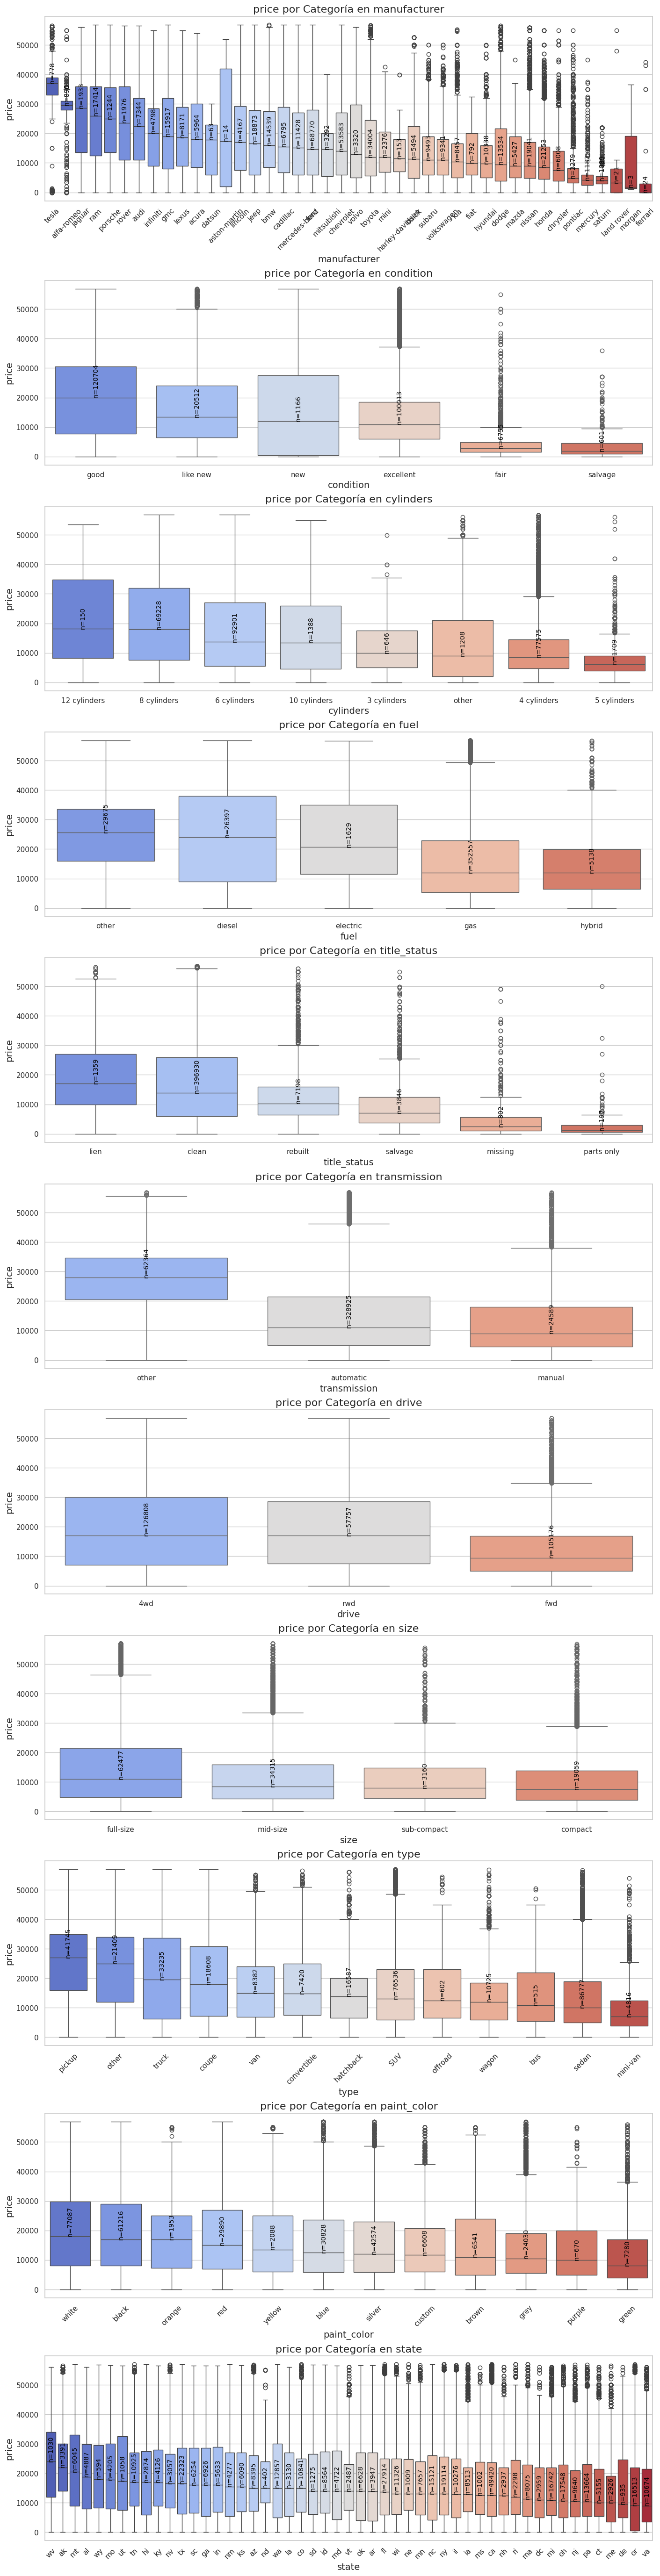

In [ ]:
target_var = 'price'
percentil = 98

# Calcular el percentil 98 de la variable
percent = np.percentile(data[target_var].dropna(), percentil)
print(percent)

# Filtrar los valores hasta el percentil 98
filtered_data = data[data[target_var] <= percent]

# Crear el grid de subplots
n_cats = len(categorical_cols_reduced)
fig, axes = plt.subplots(n_cats, 1, figsize=(14, 5 * n_cats), constrained_layout=True)

# Generar un boxplot por cada variable categórica
for ax, cat in zip(axes, categorical_cols_reduced):
    # Ordenar las categorías según la mediana calculada
    medians = filtered_data.groupby(cat)[target_var].median().sort_values(ascending=False)
    ordered_categories = medians.index

    # Generar el boxplot con las categorías ordenadas
    sns.boxplot(x=cat, y=target_var, data=filtered_data, order=ordered_categories, palette='coolwarm', ax=ax)
    ax.set_title(f'{target_var} por Categoría en {cat}', fontsize=16)
    ax.set_xlabel(cat, fontsize=14)
    ax.set_ylabel(target_var, fontsize=14)

    # Añadir las etiquetas con el número de registros
    for i, category in enumerate(ordered_categories):
        # Filtrar los datos de la categoría actual
        category_data = filtered_data[filtered_data[cat] == category][target_var]
        num_records = len(category_data)

        # Calcular la mediana de la categoría
        median_value = category_data.median()

        # Verificar que la mediana es un valor finito y añadir la etiqueta
        if np.isfinite(median_value):
            # Colocar la etiqueta con el número de registros encima de la mediana
            ax.text(
                i, median_value,  # i es la posición en el eje x
                f'n={num_records}',
                ha='center', va='bottom', fontsize=10, color='black', rotation=90  # Girar etiqueta 90 grados
            )

    # Condición para rotar etiquetas si hay más de 10 categorías
    num_categories = filtered_data[cat].nunique()
    if num_categories > 10:
        ax.tick_params(axis='x', labelrotation=45)  # Rotar etiquetas en 45 grados
    else:
        ax.tick_params(axis='x', labelrotation=0)  # Dejar etiquetas horizontales

# Mostrar el grid de boxplots
plt.show()


In categorical variables, unless the relationship with the target variable is very strong, it is not easy to detect clear patterns. When looking at these boxplot graphs, in most cases we can see that there might be some kind of relationship, but we’re not able to interpret it with much clarity.

There are cases like the condition variable where a clear relationship between price and condition can be seen through some of its categories. For example, the categories salvage and fair show the lowest vehicle prices, especially salvage. This makes sense, since if the car is only good for scrap, its value must be significantly lower than that of the same vehicle in other conditions. The same goes for fair, where the vehicle may still work if it receives some mechanical repair. However, for the remaining categories, the difference between them is not as clear, likely due to many other factors and variables influencing the relationship.

Another clear example of a visible relationship between a categorical variable and the target is the title_status variable. It clearly shows that vehicles sold as parts only have the lowest prices because they are sold for their components. Next are those with a missing title, which often indicates legal issues like theft or similar. Then come vehicles declared salvage, followed by rebuilt, then clean, and finally lien, which indicates the vehicle still has an outstanding loan that needs to be paid off. This variable could indeed provide relevant information for the model. That doesn't mean others won’t, but this one stands out even visually.

When we look at variables like drive, we find categories like fwd with significantly lower prices, probably because it's the most common type of traction among manufacturers. But then, looking in detail at the boxplots for the other two categories, 4wd and rwd, the diagrams are practically the same, and both have a large and representative number of records. This suggests that, in terms of price, there is no relationship. For all practical purposes, it’s as if they were the same category.

Looking at the size variable, we can immediately see that most of the boxplots are almost identical. It’s true that the full-size category shows a few higher values, but the median and lower values are distributed in the same way as the other categories in relation to price. This raises doubts about whether there’s any clear relationship with our target variable. If we also consider that the number of samples in each group is representative, but all together don’t even make up 30% of the total records, it suggests that this variable provides very little information. The final decision on this will be made in the next section.

As for the rest, there’s a bit of everything. In some cases we can sense a possible relationship, but it’s not clearly interpretable, and in others it might exist or not, but we’re not able to see it. We also can’t affirm that there’s no relationship, as in the last example, since the boxplots differ slightly.

# Numerical Variable Analysis

In [ ]:
data.describe()

,id,price,year,odometer,county,lat,long
count,7.281300e+04,7.281200e+04,72535.000000,7.151500e+04,0.0,72602.000000,72602.000000
mean,7.312174e+09,1.045399e+05,2011.069139,9.553354e+04,NaN,36.941946,-114.791324
std,4.705552e+06,1.310846e+07,10.243856,2.549107e+05,NaN,6.121994,14.194690
min,7.208550e+09,0.000000e+00,1900.000000,0.000000e+00,NaN,-84.122245,-158.599600
25%,7.309278e+09,6.000000e+03,2008.000000,3.500000e+04,NaN,33.779214,-121.364800
50%,7.313789e+09,1.400000e+04,2014.000000,7.963000e+04,NaN,35.246801,-118.404820
75%,7.315850e+09,2.599600e+04,2017.000000,1.270000e+05,NaN,38.576200,-111.926100
max,7.316935e+09,3.009549e+09,2022.000000,1.000000e+07,NaN,82.390818,173.885502


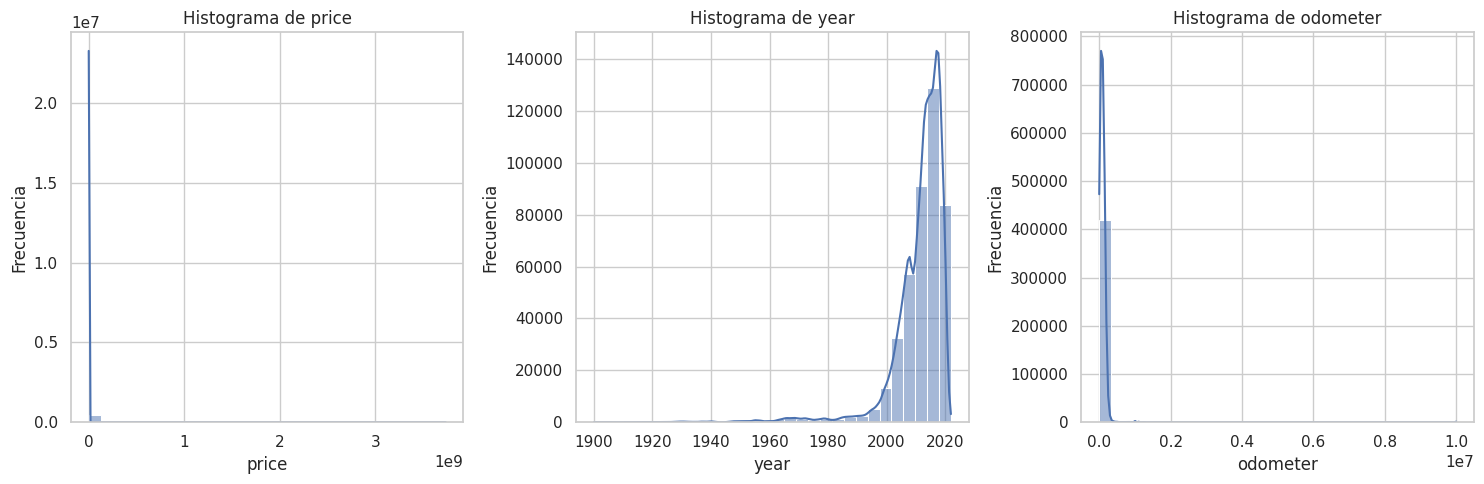

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Definir las columnas a graficar
columns = ['price', 'year', 'odometer']

# Crear los histogramas
plt.figure(figsize=(15, 5))
for i, col in enumerate(columns, 1):
    plt.subplot(1, 3, i)
    sns.histplot(data[col], bins=30, kde=True)
    plt.title(f'Histograma de {col}')
    plt.xlabel(col)
    plt.ylabel('Frecuencia')

plt.tight_layout()
plt.show()


Next, we will visualize both variables using the 95th percentile to exclude outliers, since at first glance we can only clearly observe the distribution in the year variable. It is very likely that in the other two variables, the outliers are preventing us from clearly seeing the distribution.

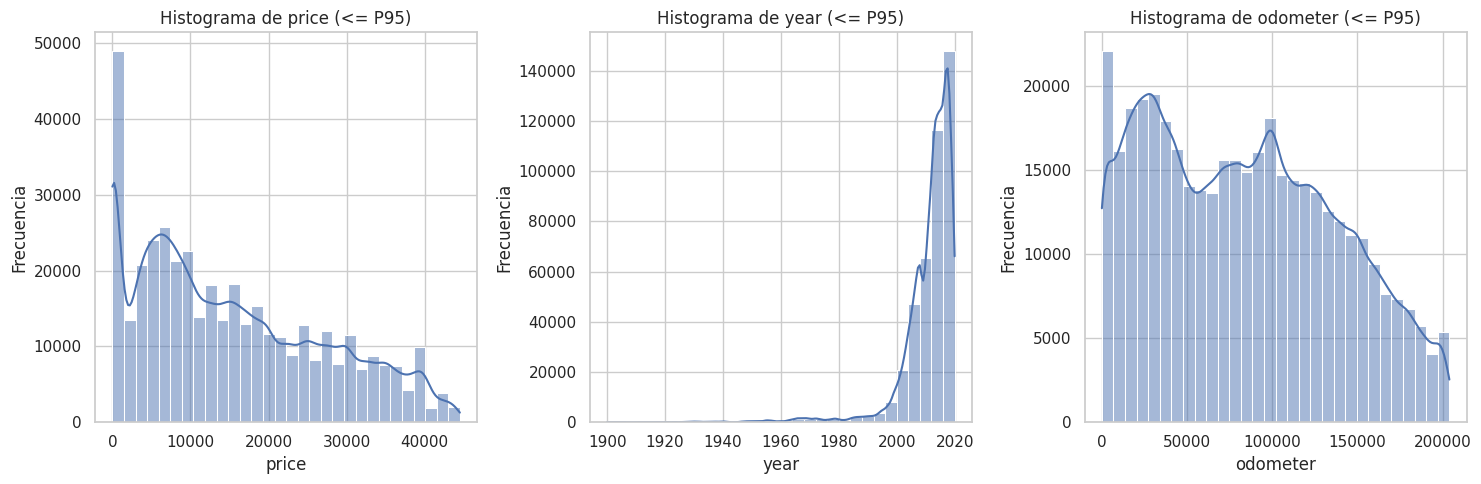

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Definir las columnas a graficar
columns = ['price', 'year', 'odometer']

# Crear los histogramas con el percentil 95
plt.figure(figsize=(15, 5))
for i, col in enumerate(columns, 1):
    # Calcular el percentil 95
    p95 = data[col].quantile(0.95)
    # Filtrar los datos menores o iguales al percentil 95
    filtered_data = data[data[col] <= p95]

    plt.subplot(1, 3, i)
    sns.histplot(filtered_data[col], bins=30, kde=True)
    plt.title(f'Histograma de {col} (<= P95)')
    plt.xlabel(col)
    plt.ylabel('Frecuencia')

plt.tight_layout()
plt.show()


What stands out is that the bar representing the value 0 is the tallest in both the price and odometer histograms. In the case of mileage, this might make sense, as it's quite common to sell cars with zero kilometers or nearly new ones. However, it's more striking when it comes to price. While it's true that some cars are sold for parts, and their remaining value may be minimal — just a few hundred dollars — free? We'll have to see whether this is normal or if we should treat these values as erroneous.

As for the year histogram, it’s not very useful or informative in this case, since there were no outliers. So, all we’ve done is remove 5% of the data, which falls between the years 2020 and 2022.

Now, let's count the values that are strictly 0 in these variables. To do so, we’ll define a function that calculates it for us.

In [ ]:
import pandas as pd

def count_zeros_with_percentage(df, columns):
    total_rows = len(df)

    # Contar ceros en cada columna
    zero_counts = df[columns].apply(lambda x: (x == 0).sum())

    # Calcular porcentaje
    zero_percentages = (zero_counts / total_rows) * 100

    # Crear DataFrame con resultados
    result = pd.DataFrame({
        'Column': zero_counts.index,
        'Zero Count': zero_counts.values,
        'Zero Percentage (%)': zero_percentages.round(2)
    })

    # Ordenar por porcentaje descendente
    result = result.sort_values(by='Zero Percentage (%)', ascending=False).reset_index(drop=True)

    return result

# Llamada a la función
zero_table = count_zeros_with_percentage(data, columns)

# Mostrar tabla
print(zero_table)


     Column  Zero Count  Zero Percentage (%)
0     price       32895                 7.71
1  odometer        1965                 0.46
2      year           0                 0.00


We can see that there is a high number of records for vehicles sold at a price of $0. It has no sense for our proyect so we are going to elimate those records.
There are also a few records of vehicles with 0 km, although they are less common.


In [ ]:
# Eliminar filas donde price es igual a 0
data = data[data['price'] != 0]

Now, let’s analyze the relationship between the three numerical variables. To do this, we’ll calculate a correlation matrix where we can observe the correlation for each pair of variables. We'll define a function that displays the matrix based on a DataFrame we pass as input, along with a percentile parameter in case we want to avoid the issue of outliers by excluding them from the matrix. Additionally, the function will also drop any NaN values present in the columns, so we only work with the set of records that contain values in all three fields.

We will calculate two matrices: one with all the data, without removing outliers, and another one excluding the top 2% of values.

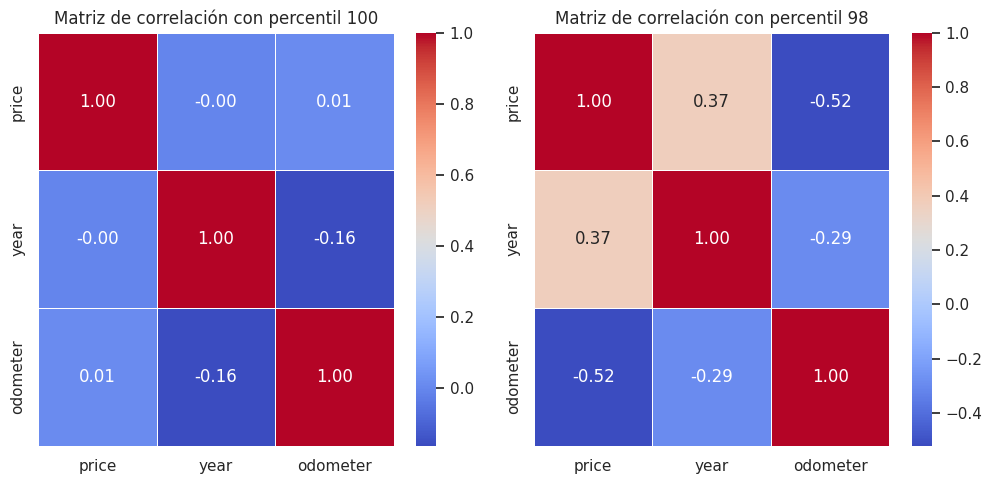

In [ ]:
# Función para crear la matriz de correlación entre las variables numéricas
def corr_matrix_percent(df, x):
    # quitamos del dataframe todos los registros con valores nulos (NaN) en alguna de las columnas numericas
    filtered_data = df[columns].dropna()

    for i, col in enumerate(columns):
        # Calcular el percentil x de la variable
        percent = np.percentile(filtered_data[col], x)

        # Filtrar los valores hasta el percentil x
        filtered_data = filtered_data[filtered_data[col] <= percent]

    # Correlación entre variables numéricas
    correlation_matrix = filtered_data.corr()
    return correlation_matrix

percentiles = [100,98]

fig, axes = plt.subplots(nrows=(len(percentiles) // 3) + 1, ncols=3, figsize=(15, 5 * ((len(percentiles) // 3) + 1)))
axes = axes.flatten()

for i, percentil in enumerate(percentiles):
    corr_matrix = corr_matrix_percent(data,percentil)

    # Graficar matriz
    sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5, ax=axes[i])
    axes[i].set_title(f'Matriz de correlación con percentil {percentil}')

# Eliminar ejes sobrantes si hay menos de 3 variables
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

In the matrix on the left, we can see that there is no correlation between any of the three variables — all the coefficients are practically zero. However, when reducing the percentile to 98 and omitting outliers, a certain relationship between the three variables becomes apparent. The relationship between the target variable price and the other two is particularly interesting.

With year, there is a correlation of 0.37, which could be considered significant enough to suggest that it is a relevant variable. This makes sense: the older the car, in many cases, the lower its price tends to be. The relationship isn’t very strong because there are many other factors that influence the price.

On the other hand, the relationship with odometer (mileage) is even stronger, at -0.52. The negative coefficient indicates an inverse relationship, which also makes sense: the more kilometers a car has, the more wear and tear it likely has, and therefore, its price tends to drop.

1.4 Analysis of Missing Values

We will now proceed to analyze the missing values (or null values). To do this, we’ll take the complete dataset again, including both the numerical and categorical variables.

In [ ]:
# Análisis de Missing Values
missing_data = data.isnull().sum()
missing_data_percentage = (missing_data / len(data)) * 100

# Crear un dataframe con ambas columnas
missing_summary = pd.DataFrame({'Missing Values': missing_data,'Percentage': missing_data_percentage})

# Mostrar resultados
print("\nPorcentaje de valores faltantes por columna:")
missing_summary.sort_values(by='Percentage', ascending=False)


Porcentaje de valores faltantes por columna:


,Missing Values,Percentage
size,282933,71.813140
cylinders,160410,40.714748
condition,151389,38.425067
drive,120254,30.522482
paint_color,117149,29.734381
type,85932,21.810983
manufacturer,16185,4.108024
title_status,7734,1.963019
model,4701,1.193193
fuel,2594,0.658401


The size variable has a percentage of missing values higher than 70%. Additionally, this variable shows practically no relationship between its categories and the target variable, meaning that its variability barely explains any of the variability of our target. On the other hand, when we studied its relationship with other variables using Cramér’s V, we also saw that there was no strong connection to any other variable that could help us fill in the missing values in a meaningful way. For these reasons, it makes sense to remove this variable from the dataset.

Continuing the analysis, we next have the cylinders and condition variables. Both show a high volume of missing values. However, especially the condition variable showed some relationship with the target variable, so it would be a shame to discard it. In both cases, we also observe some (not very strong) relationships with other variables according to Cramér’s V. For example, condition has a Cramér’s V of 0.38 with transmission, and cylinders has a Cramér’s V of 0.39 with drive. In this case, the drive variable itself has a high number of missing values, which makes imputing missing values in cylinders a bit more difficult. However, transmission has almost no missing values, so it could be used to help impute the missing values in condition.

On the other hand, drive does have some variables with which it shows stronger relationships. For example, it has a Cramér’s V of 0.46 with manufacturer and 0.55 with type. These are not negligible, and it could make sense to use them to fill in the missing values in drive.

The type variable also has a significant amount of missing entries, so we should also consider a strategy for handling it. It’s a variable that may contribute relevant information.

From here on, the remaining variables have less than 5% missing data. In these cases, strategies like dropping the corresponding records could be effective—especially if we observe that the records with missing data tend to share the same missing variables. In such cases, removing those records with a high number of missing fields may have no negative impact on the model while also cleaning up the dataset.

To do this, we’ll display a table where one column shows the number of missing variables per record, another indicates the combination of variables that are missing, and a final column shows the count of records for each combination. This will help us make better decisions regarding the removal of records and/or variables.


In [ ]:
# Contar valores null por fila quitando la variable size
null_counts = data.drop(columns=['size'], inplace=False).isnull().sum(axis=1)

# Crear la tabla resumen
summary = null_counts.value_counts().reset_index()
summary.columns = ['num_nulls', 'count']
summary = summary.sort_values('num_nulls').reset_index(drop=True)

# Aplicar estilo con pandas Styler par mostrar en rojo num_nulls >= 6
def highlight_rows(s):
    color = 'background-color: red; color: white;' if s['num_nulls'] >= 6 else ''
    return [color] * len(s)

summary_styled = summary.style.apply(highlight_rows, axis=1)

# Mostrar resultado estilizado
summary_styled


,num_nulls,count
0,0,111636
1,1,101507
2,2,77591
3,3,43959
4,4,18881
5,5,36149
6,6,3866
7,7,13
8,8,122
9,9,198


Given the numbers obtained, it makes sense to remove all records that have six or more missing variables. This does not represent a large volume of data—approximately 1% of the dataset—and in any case, those records are missing information for at least six variables.

We will now recalculate the table that tracks missing values, this time excluding both the records marked in red (those with six or more missing fields) and the size variable, to see what the situation would look like after applying these filters.

In [ ]:
# Análisis de Missing Values
df = data.drop(columns=['size'], inplace=False)
df = df.dropna(thresh=df.shape[1] - 5)
missing_data = df.isnull().sum()
missing_data_percentage = (missing_data / len(data)) * 100

# Crear un dataframe con ambas columnas
missing_summary = pd.DataFrame({'Missing Values': missing_data,'Percentage': missing_data_percentage})

# Mostrar resultados
print("\nPorcentaje de valores faltantes por columna:")
missing_summary.sort_values(by='Percentage', ascending=False)


Porcentaje de valores faltantes por columna:


,Missing Values,Percentage
cylinders,156210,39.648718
condition,147130,37.344061
drive,115999,29.442491
paint_color,112964,28.672158
type,81717,20.741145
manufacturer,13484,3.422465
title_status,7263,1.843471
model,3397,0.862216
fuel,2114,0.536569
odometer,1981,0.502811


Next, we are going to take a closer look at the missing values in the condition variable. As we've seen, this variable shows some relationship with the target variable through the boxplots. We’ll now perform a comparison to understand whether the missing values in this variable follow any meaningful pattern with respect to the target variable. This will help us make a final decision about whether to keep or discard this variable.

We will display two boxplots:

One shows the distribution of price (after filtering for the 98th percentile) for the entire dataset, in order to remove outliers and better visualize the distribution.

The second boxplot shows the same distribution, but this time only for records where the condition variable is missing.

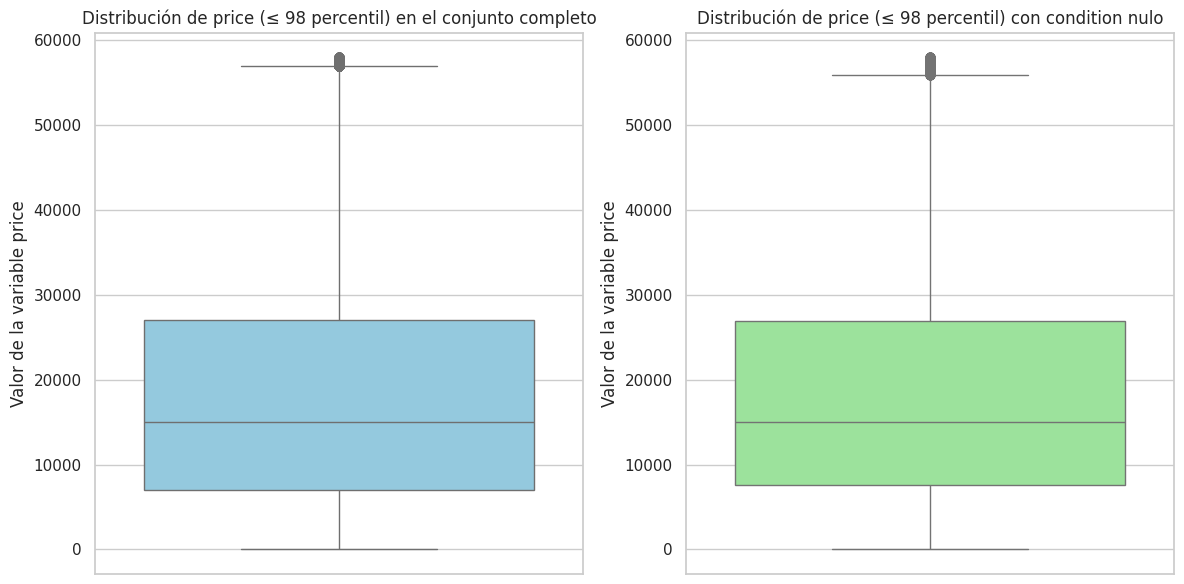

In [ ]:
# Configuración para gráficos
sns.set(style="whitegrid")  # Estilo de gráficos

# Calcular el percentil de la variable objetivo 'price'
p = 98
percentile = df['price'].quantile(p/100)

# Filtrar los datos: registros donde 'price' <= percentil
df_percentile = df[df['price'] <= percentile]

# Filtrar datos donde 'condition' es nulo y 'price' <= percentil
df_null_X = df_percentile[df_percentile['condition'].isnull()]

# Crear los boxplots
plt.figure(figsize=(12, 6))  # Tamaño del gráfico

# Primer Boxplot: Todo el conjunto de datos
plt.subplot(1, 2, 1)
sns.boxplot(y='price', data=df_percentile, color="skyblue")
plt.title(f"Distribución de price (≤ {p} percentil) en el conjunto completo")
plt.ylabel("Valor de la variable price")

# Segundo Boxplot: Registros donde condition es nulo
plt.subplot(1, 2, 2)
sns.boxplot(y='price', data=df_null_X, color="lightgreen")
plt.title(f"Distribución de price (≤ {p} percentil) con condition nulo")
plt.ylabel("Valor de la variable price")

# Mostrar los gráficos
plt.tight_layout()
plt.show()

In this case, we can see that both distributions are nearly identical: they have practically the same median, same interquartile range (IQR), and similar outlier percentiles. This indicates that there doesn’t seem to be any pattern in the price variable related to the missing values in condition.

Taking this into account, and considering that the category-level boxplots suggested that this variable does provide valuable information for the target variable, it makes sense to consider two possible approaches for handling this variable:

Impute missing values using the mode (most frequent category), accepting the potential shift in distribution and the resulting impact on prediction.

Leverage the moderate relationship between condition and transmission (as shown by a Cramér's V of 0.38) to impute missing values using a more informed method, such as:

Conditional mode based on transmission, or

K-Nearest Neighbors (KNN) adapted for categorical variables, using transmission as a key input.

We’ll later evaluate model performance with and without this imputation to assess whether it truly adds value.

For now, we'll proceed with the conditional mode imputation based on transmission, as this variable has almost no missing values and appears to be a solid candidate for that strategy.

Now, let's perform the same analysis for the cylinders variable. We'll plot the boxplots:

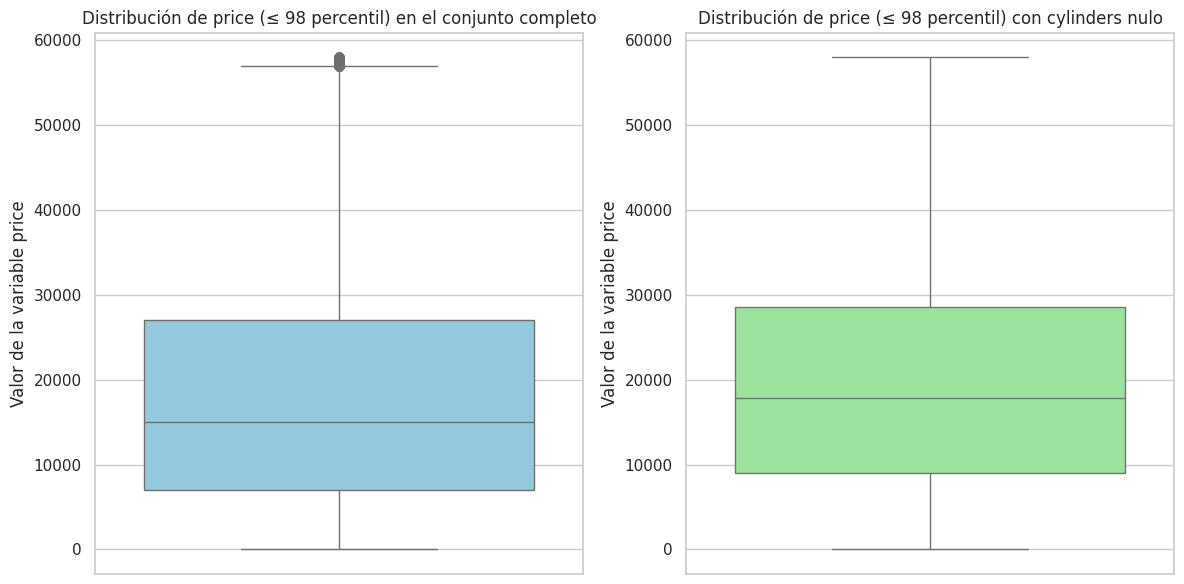

In [ ]:
# Configuración para gráficos
sns.set(style="whitegrid")  # Estilo de gráficos

# Calcular el percentil de la variable objetivo 'price'
p = 98
percentile = df['price'].quantile(p/100)

# Filtrar los datos: registros donde 'price' <= percentil
df_percentile = df[df['price'] <= percentile]

# Filtrar datos donde 'condition' es nulo y 'price' <= percentil
df_null_X = df_percentile[df_percentile['cylinders'].isnull()]

# Crear los boxplots
plt.figure(figsize=(12, 6))  # Tamaño del gráfico

# Primer Boxplot: Todo el conjunto de datos
plt.subplot(1, 2, 1)
sns.boxplot(y='price', data=df_percentile, color="skyblue")
plt.title(f"Distribución de price (≤ {p} percentil) en el conjunto completo")
plt.ylabel("Valor de la variable price")

# Segundo Boxplot: Registros donde condition es nulo
plt.subplot(1, 2, 2)
sns.boxplot(y='price', data=df_null_X, color="lightgreen")
plt.title(f"Distribución de price (≤ {p} percentil) con cylinders nulo")
plt.ylabel("Valor de la variable price")

# Mostrar los gráficos
plt.tight_layout()
plt.show()

In this case, the situation is similar — we see almost identical boxplots in both scenarios, so the missing values in cylinders do not seem to follow any specific pattern related to price.

Since this variable showed a moderate relationship with the drive variable, but drive itself also has a very high number of missing values, our next step is to calculate how many of the missing values in cylinders actually have a value in drive. This will help us determine whether it would make sense to impute cylinders based on drive.

In [ ]:
# Crear la tabla de contingencia sin modificar el dataframe original
contingency_table = pd.crosstab(data['cylinders'].isnull(), data['drive'].isnull(),
                                rownames=['cylinders_is_null'], colnames=['drive_is_null'])

# Mostrar la tabla de contingencia
contingency_table

drive_is_null,False,True
cylinders_is_null,,
False,199126,34449
True,74605,85805


When analyzing the matrix, we see that out of the 177,678 missing values in the cylinders variable, a little less than half have a value in the drive variable. This means that, through imputation, we can recover at most 82,463 values. For the remaining 95,215, it will still be necessary to apply some technique. At this point, an interesting option would be to impute the missing values using the mode category. It's true that this will alter the distribution of the variable, as there were 3 categories with roughly the same frequency, accounting for 98% of the records. With this mode imputation, the modal category — which currently represents 38% — will likely double or more in representation.

Another option is to impute using a conditional mode-based algorithm based on the drive variable, after first imputing the 95,215 missing values in drive based on its relationship with the manufacturer variable.

Switching gears, let's now look at variables with only a small percentage of missing data. We'll focus the analysis on those variables that appear to have an important relationship with the target variable: year and odometer (numeric variables), and title_status (categorical). These variables have a very low volume of missing values (less than 2%), which means approximately between 1,000 and 7,000 records. Given their relevance in predicting the target variable, it’s best not to distort their distribution or introduce bias.

For title_status, if we look at the bulk of values, 93% of records fall under the clean category. Therefore, imputing the missing values with the modal category would not only avoid distorting the distribution, but also prevent losing information from other variables due to the deletion of these records.

odometer and year need to be treated differently, as their values are numerical. We previously noted that their distributions are not symmetric. In this case, imputation with the median would be appropriate. The median is a more accurate value, since the mean is more heavily affected by outliers.

Regarding the transmission variable — which we plan to use for algorithmic imputation of condition — it has very few missing records (~1,700). Among its categories, the automatic type accounts for 77% of the data, and together with manual, they make up 83%. Considering that both categories have very similar distributions for the target variable, imputing missing values with the modal category automatic makes sense.

On the other hand, we have the fuel variable, which shows some level of relationship with manufacturer. In this case, the few missing values could be imputed using a mode-based algorithm.

Now let’s address the rest of the variables with missing values. One important variable remains: manufacturer. Besides having a clear relationship with the target variable, we’ll also use it to impute missing values in both the fuel and drive variables, so we need to address its own missing values. Logically, this variable must be closely related to the model variable, since vehicle models are usually brand names assigned by manufacturers based on certain characteristics. It makes sense to evaluate the relationship between the two, and if it's strong, use the model variable — which has very few missing values — to impute those of manufacturer.

In [ ]:
# calculamos la tabla de contingencia entre manufacturer y model
contingency_table = pd.crosstab(df['manufacturer'], df['model'])

# calculamos su V de Cramer para ver la relación entre ambas
value = cramers_v(contingency_table)
value

np.float64(0.9859494274678482)

As expected, the Cramér's V coefficient is the highest observed so far, which means that using the model variable to impute the missing values in manufacturer seems like a solid strategy.

Once we've resolved the missing values in manufacturer, we can use this variable to impute missing values in fuel and drive via conditional modes, as both show a high relationship according to Cramér’s V—especially drive, with a value of 0.46.

Next is the type variable, which has many missing values and a strong relationship with drive. So, after imputing drive, we can use it to impute type. Also, this variable's records are fairly evenly distributed across categories, so imputing using the modal category would distort the distribution significantly. Eliminating records isn't a good option either, considering that doing so would mean dropping about 21% of the data.

We still have the paint_color variable. In this case, since it doesn't have any significant relationship with other variables—as shown by Cramér’s V values close to zero—and because it has a large number of records spread across many categories, the most reasonable approach is random imputation weighted by frequency. This way, the random assignment remains proportional to category sizes, preserving the original distribution. It doesn’t seem like a highly relevant variable for the target, but it might still provide some information, so we shouldn’t discard it despite the high volume of missing values.

Finally, the model variable—which we used to impute manufacturer and, subsequently, other variables—has about 3,800 missing records. In this case, since we had already planned to leave this variable out of the dataset for now, only bringing it in later during modeling if necessary, there’s no need to process its missing values. We'll simply keep it on the bench in case we need it later.

Next, we will proceed to analyze outliers in the numerical variables. We’ll examine the three numerical variables we have, including the target variable. We'll start by visually displaying outliers using histograms to show how they are distributed.

To detect them, we first need to define a criterion. We’ll analyze them using two different criteria and observe the differences between them and the conclusions we can draw.

The first criterion will be the Z-Score metric (k standard deviations from the mean).


Variable: price
Umbral inferior: -37575099.03202288
Umbral superior: 37728693.52021064


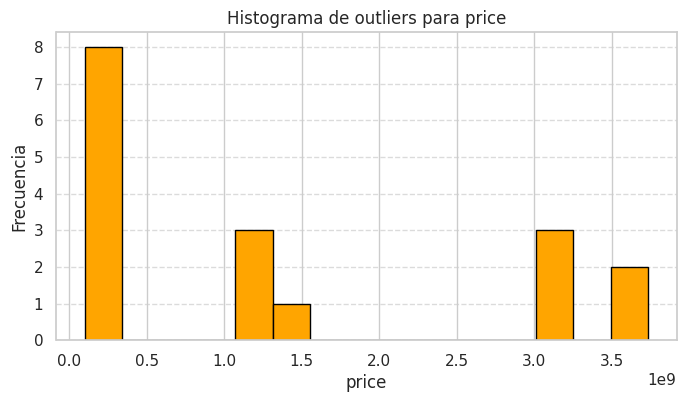


Variable: year
Umbral inferior: 1982.8335119993137
Umbral superior: 2039.3761364508512


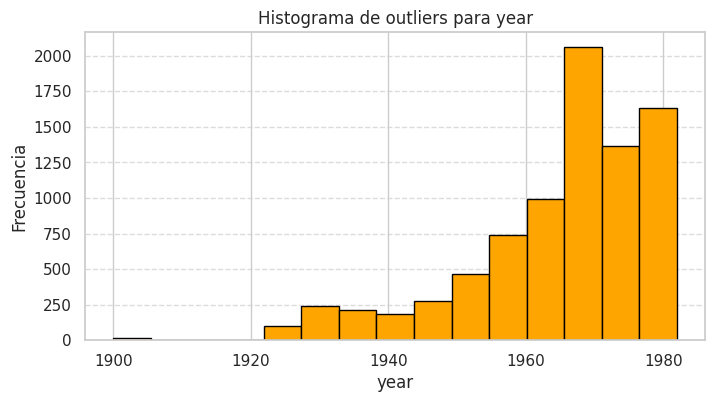


Variable: odometer
Umbral inferior: -495609.6530943045
Umbral superior: 691738.9297370205


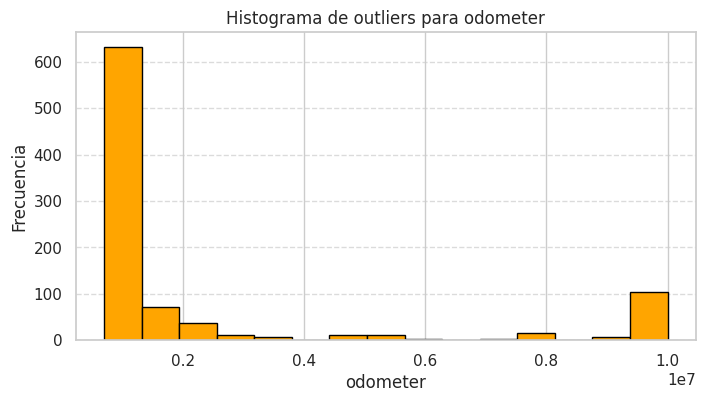


Outliers identificados:
   Variable  Outliers
0     price        17
1      year      8304
2  odometer       915


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

outliers_list = []

for column in columns:
    z_scores = np.abs(stats.zscore(df[column], nan_policy='omit'))
    outlier_indices = np.where(z_scores > 3)[0]

    # Calculamos la media y la desviación estándar
    mu = np.mean(df[column])
    sigma = np.std(df[column])

    # Calculamos los valores correspondientes a un Z-score de 3 y -3
    upper_bound = mu + 3 * sigma
    lower_bound = mu - 3 * sigma

    print(f"\nVariable: {column}")
    print(f"Umbral inferior: {lower_bound}")
    print(f"Umbral superior: {upper_bound}")

    if len(outlier_indices) > 0:
        outliers_list.append({'Variable': column, 'Outliers': len(outlier_indices)})

        # Pintar histograma de los valores outliers
        plt.figure(figsize=(8, 4))
        plt.hist(df[column].iloc[outlier_indices], bins=15, color='orange', edgecolor='black')
        plt.title(f'Histograma de outliers para {column}')
        plt.xlabel(column)
        plt.ylabel('Frecuencia')
        plt.grid(axis='y', linestyle='--', alpha=0.7)
        plt.show()

# Convertimos la lista en un DataFrame
outliers_df = pd.DataFrame(outliers_list)

print("\nOutliers identificados:")
print(outliers_df)


In this case the z-score metric doesn´t give us useful results. Due to the high standard desviation the thresholds obtained has no sense. Thats why we are going to use the IQR method. However the data obtained in year could be useful


Variable: price
Q1 (25%): 7299.0
Q3 (75%): 27800.0
IQR: 20501.0
Umbral inferior: -23452.5
Umbral superior: 58551.5


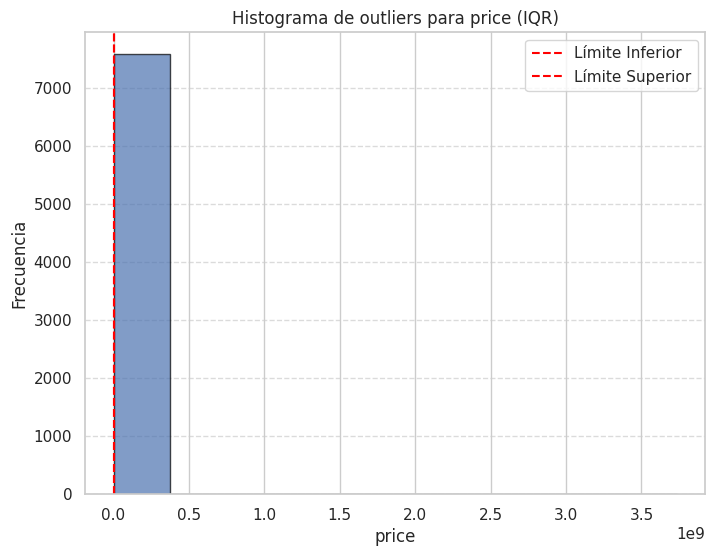


Variable: year
Q1 (25%): 2008.0
Q3 (75%): 2017.0
IQR: 9.0
Umbral inferior: 1994.5
Umbral superior: 2030.5


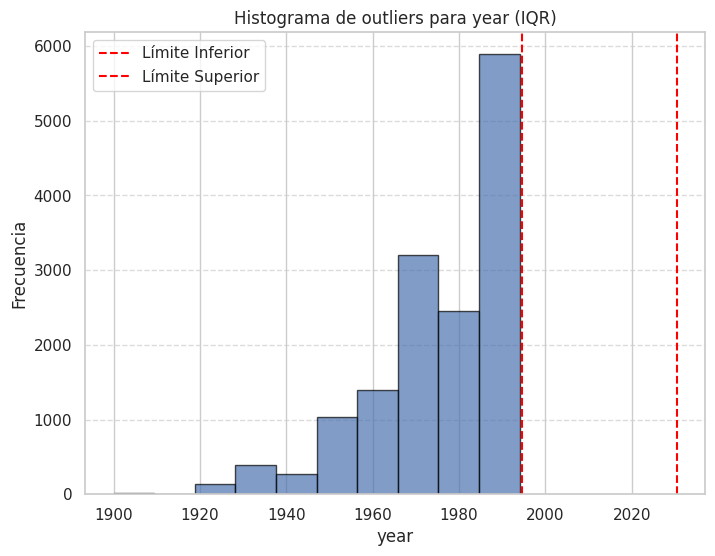


Variable: odometer
Q1 (25%): 37943.0
Q3 (75%): 135137.0
IQR: 97194.0
Umbral inferior: -107848.0
Umbral superior: 280928.0


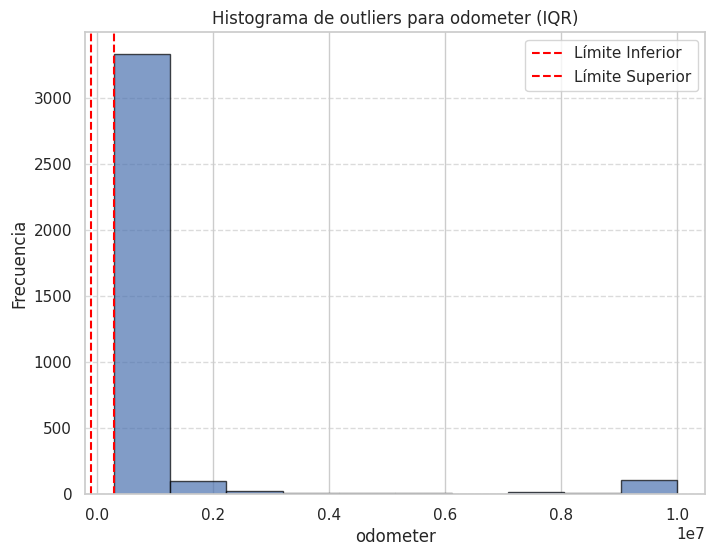


Outliers identificados mediante IQR:
   Variable  Outliers
0     price      7592
1      year     14792
2  odometer      3622


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

outliers_list = []

for column in columns:
    df_col_dropna = df[column].dropna()
    Q1 = df_col_dropna.quantile(0.25)
    Q3 = df_col_dropna.quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Identificar outliers
    outliers_values = df_col_dropna[(df_col_dropna < lower_bound) | (df_col_dropna > upper_bound)]

    if not outliers_values.empty:
        outliers_list.append({'Variable': column, 'Outliers': len(outliers_values)})

        print(f"\nVariable: {column}")
        print(f"Q1 (25%): {Q1}")
        print(f"Q3 (75%): {Q3}")
        print(f"IQR: {IQR}")
        print(f"Umbral inferior: {lower_bound}")
        print(f"Umbral superior: {upper_bound}")

        # Histograma de outliers
        plt.figure(figsize=(8, 6))
        plt.hist(outliers_values, bins=10, edgecolor='black', alpha=0.7)
        plt.axvline(lower_bound, color='red', linestyle='--', label='Límite Inferior')
        plt.axvline(upper_bound, color='red', linestyle='--', label='Límite Superior')
        plt.title(f"Histograma de outliers para {column} (IQR)")
        plt.xlabel(column)
        plt.ylabel("Frecuencia")
        plt.legend()
        plt.grid(axis='y', linestyle='--', alpha=0.7)
        plt.show()

# Convertir a DataFrame
outliers_df = pd.DataFrame(outliers_list)

# Mostrar resultados finales
print("\nOutliers identificados mediante IQR:")
print(outliers_df)


With this new criterion, the outlier detection thresholds are much stricter. For the year variable, the previous criterion was already too strict, so this one, setting the lower threshold in 1994, is very restrictive. For the other two variables, while the thresholds are more appropriate, it seems we've gone a bit too far. For instance, an upper threshold of $58551.0 seems too tight since many cars will have prices slightly above this. The same applies to the odometer, 280928.0 km isn't such an outrageous number for used cars; it seems like a fairly common value for this type of sale. These strict thresholds are what have increased the number of outliers from 17 to 7592 in price and from 915 to 3622 in odometer.

By applying different criteria to each variable, we will likely find a middle ground. Additionally, we have the possibility of adjusting the criteria if we find it appropriate by modifying the value of the algorithm that determines the conditions (Z-Score in one and k times IQR in the other).

For now, the Z-Score criterion seems more suitable for a variable like year, where the mean, despite being an asymmetric distribution, isn’t too far from the median (2011 vs. 2013, respectively), where the thresholds get distorted. If it feels too restrictive for this variable, we could try increasing the allowed Z-Score to 4.

Variable: year
Media: 2011.1048242250824
Desviación estándar: 9.423782866543919
Umbral inferior (Z=-4): 1973.4096927589067
Umbral superior (Z=4): 2048.799955691258
Outliers identificados (Z-score > 4): 6010


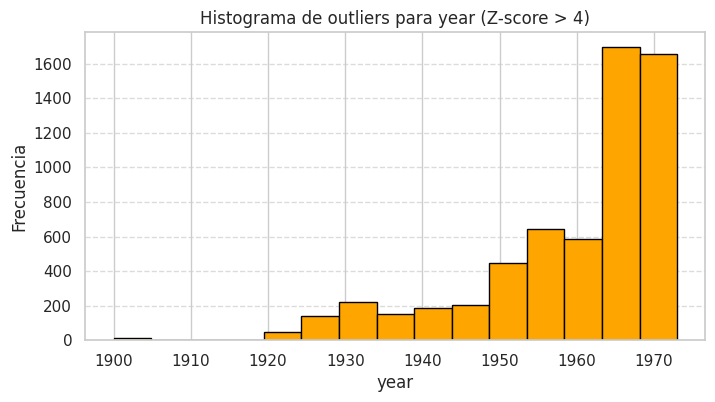


Resumen de outliers detectados:
  Variable  Outliers
0     year      6010


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats

# Variable a analizar
variable = 'year'

# Cálculo de Z-scores
z_scores = np.abs(stats.zscore(df[variable], nan_policy='omit'))
outlier_indices = np.where(z_scores > 4)[0]

# Estadísticas básicas
mu = df[variable].mean()
sigma = df[variable].std()

lower_bound = mu - 4 * sigma
upper_bound = mu + 4 * sigma

print(f"Variable: {variable}")
print(f"Media: {mu}")
print(f"Desviación estándar: {sigma}")
print(f"Umbral inferior (Z=-4): {lower_bound}")
print(f"Umbral superior (Z=4): {upper_bound}")
print(f"Outliers identificados (Z-score > 4): {len(outlier_indices)}")

# Guardar info en lista
outliers_data = []
if len(outlier_indices) > 0:
    outliers_data.append({'Variable': variable, 'Outliers': len(outlier_indices)})

    # Graficar
    plt.figure(figsize=(8, 4))
    plt.hist(df[variable].iloc[outlier_indices], bins=15, color='orange', edgecolor='black')
    plt.title(f'Histograma de outliers para {variable} (Z-score > 4)')
    plt.xlabel(variable)
    plt.ylabel('Frecuencia')
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()

# Convertir a DataFrame si hay datos
if outliers_data:
    outliers_df = pd.DataFrame(outliers_data)
    print("\nResumen de outliers detectados:")
    print(outliers_df)


For the other two variables, we will use the IQR range criterion, as it is less sensitive to the mean when it is skewed due to extreme outliers. In both cases, we will try using 3 times the IQR instead of 1.5 times to allow for some additional values.


Variable: price
Q1 (25%): 7299.0
Q3 (75%): 27800.0
IQR: 20501.0
Umbral inferior: -54204.0
Umbral superior: 89303.0
Outliers identificados: 980


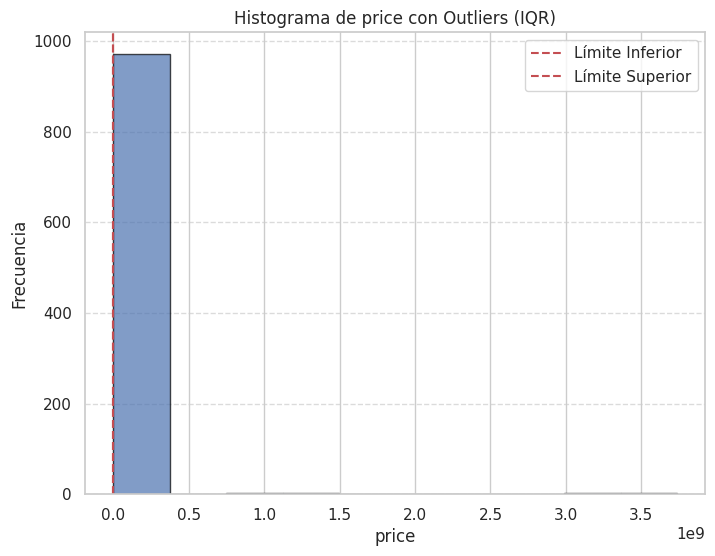


Variable: odometer
Q1 (25%): 37943.0
Q3 (75%): 135137.0
IQR: 97194.0
Umbral inferior: -253639.0
Umbral superior: 426719.0
Outliers identificados: 1262


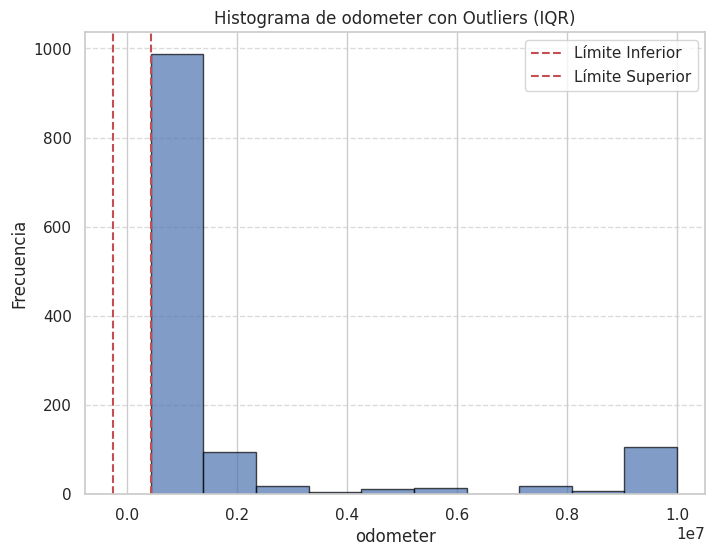


Outliers identificados mediante IQR:
   Variable  Outliers
0     price       980
1  odometer      1262


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Lista para almacenar los resultados
outliers_data = []

# Columnas a analizar
columns_to_check = ['price', 'odometer']

# Iterar sobre las columnas
for column in columns_to_check:
    df_col_dropna = df[column].dropna()

    # Cálculo de los cuartiles y el rango intercuartílico (IQR)
    Q1 = df_col_dropna.quantile(0.25)
    Q3 = df_col_dropna.quantile(0.75)
    IQR = Q3 - Q1

    # Limites para detectar outliers (3 veces el IQR)
    lower_bound = Q1 - 3 * IQR
    upper_bound = Q3 + 3 * IQR

    # Identificar los outliers
    outliers_values = df_col_dropna[(df_col_dropna < lower_bound) | (df_col_dropna > upper_bound)]

    # Si se identificaron outliers, almacenarlos en la lista
    if len(outliers_values) > 0:
        outliers_data.append({'Variable': column, 'Outliers': len(outliers_values)})

        # Imprimir estadísticas
        print(f"\nVariable: {column}")
        print(f"Q1 (25%): {Q1}")
        print(f"Q3 (75%): {Q3}")
        print(f"IQR: {IQR}")
        print(f"Umbral inferior: {lower_bound}")
        print(f"Umbral superior: {upper_bound}")
        print(f"Outliers identificados: {len(outliers_values)}")

        # Graficar los histogramas de los outliers
        plt.figure(figsize=(8, 6))
        plt.hist(outliers_values, bins=10, edgecolor='black', alpha=0.7)
        plt.axvline(lower_bound, color='r', linestyle='--', label='Límite Inferior')
        plt.axvline(upper_bound, color='r', linestyle='--', label='Límite Superior')
        plt.title(f"Histograma de {column} con Outliers (IQR)")
        plt.xlabel(column)
        plt.ylabel('Frecuencia')
        plt.legend()
        plt.grid(axis='y', linestyle='--', alpha=0.7)
        plt.show()

# Convertir a DataFrame si se identificaron outliers
if outliers_data:
    outliers_df = pd.DataFrame(outliers_data)
    print("\nOutliers identificados mediante IQR:")
    print(outliers_df)


For the odometer variable, we have reached a value that we are comfortable with: 426719.0 km. It is quite a high number that doesn't cause us to lose many high values, yet we still mark 583 values as outliers, which are much higher than this figure.

In the case of price, with this criterion, we have marked 980 values with a price greater than $89303. It is true that we could increase this threshold a bit more, but it doesn’t seem irrational. We are talking about used cars, and their prices usually aren’t much higher than that.

Now we need to decide on the options we propose based on these outlier results. We could transform them to the threshold values we selected, thus not losing their records. Another option would be to perform some kind of imputation, replacing their values with some criterion. However, this option seems more complex, as, although there aren't many, going one by one with a few thousand could be quite laborious. We will opt for the option of removing the outliers from the price and odometer variables, which in the end are very few compared to the total records we have.

As for the year variable, to avoid removing 6010 records, what we will do is transform their values to the threshold value we chose in the criterion for detecting them. This will cause the distribution to change slightly at the lower threshold, but relative to the total data, we expect it to not change much. Also, by removing the outliers from the other two variables, it is possible that some records from the year outliers are also removed.

### 2. Data Preparation

Once we have carried out the Data Understanding analysis, we have a very comprehensive understanding of the data and the various relationships between the variables. We also know the quality issues associated with the dataset.

Based on all the knowledge acquired, we have drawn a series of conclusions that will allow us to make decisions and prepare the data in this Data Preparation phase. The goal is to prepare the data so that it can be used in the subsequent modeling phase without having to worry about the dataset itself.

We begin this phase by importing the libraries and reloading the original data, from which we will proceed to prepare everything.



In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from scipy import stats
from sklearn.metrics import mutual_info_score
from scipy.stats import chi2_contingency
from itertools import combinations

# Cargar el dataset desde el archivo CSV
data = pd.read_csv('vehicles_red.csv')

#2.1 Selección de variables

The first step in data cleaning will be variable selection. We will remove from the dataset all variables that are not relevant or that we have decided not to use for certain reasons.

We begin by removing the county variable, which had no value other than null. We will also remove the lat and long variables, as they seemed like irrelevant information for the used vehicle sales prediction project, especially since we will keep other variables such as region, which will likely capture part of the potential information they could provide. We also discard variables such as id or VIN, which are simply unique identifiers that don’t provide any relevant information, and the posting_date variable, which is the date the ad was posted in the last 30 days.

On the other hand, from the data study, we concluded that we should discard the size variable due to having around 71% of missing values. This is too many to maintain the variable and impute them.

Finally, we will do without the region variable, as we have the state variable, which we assume does not provide much additional information in this case.

For now, we will keep the model variable, as we will use it later for imputing null values.

In [ ]:
# Elimnar columnas irelevantes persistiendo el cambio en el dataframe original
data.drop(columns=['county','lat','long','id','VIN','size','region','posting_date'], inplace=True)

2.2 Record Selection

We now proceed with record selection. In general, we try to keep as many records as possible to retain as much information as possible.

In this regard, we will discard some records primarily related to missing values. Among all the records, some have values in all the variables, others have one variable with a null value, and some have more than one. We consider it appropriate to remove those records with a high number of variables having null values, as they do not provide enough information in the variables that could assist in the prediction, or due to the lack of information for proper value imputation, which could lead to issues with the model.

We will remove all records with 6 or more null variables:

In [ ]:
# Elimnar registros con 6 o más valores nulos persistiendo el cambio en el dataframe original
data.dropna(thresh=data.shape[1] - 5, inplace=True)

Continuing with record selection based on null values, we will remove those records that have a null value in the model and manufacturer variables. We do this because if both variables are null, we won’t be able to impute values for the manufacturer variable using the model variable, as it also lacks a value. In other cases, we either already have the manufacturer value, which is what we are interested in, or we have the model value, which will allow us to impute values in the null manufacturer entries.

In [ ]:
# Agrupar por 'model' y comprobar si todos los valores de 'manufacturer' son nulos
models_with_all_nulls = data.groupby('model')['manufacturer'].apply(lambda x: x.isnull().all())

# Filtrar los modelos donde 'manufacturer' es completamente nulo
models_all_null_list  = models_with_all_nulls[models_with_all_nulls].index.tolist()

# Eliminamos los registros con valores vacíos en Manufacturer que se encuentren en el listado de modelos anterior
data = data[~((data['manufacturer'].isnull()) & (data['model'].isin(models_all_null_list)))]

Now, we move on to the record selection based on the conclusions from the outlier analysis we obtained.

When analyzing this part, we determined that it would be best to remove the detected outliers in the price and odometer variables, as they are very few and are likely to correspond to errors or inconsistencies in the collected data. We had detected these outliers in both variables using the criterion of values beyond 3 times the IQR range. In this case, null values would also be removed as they are considered outliers. Therefore, we will handle the null values first to avoid losing information from their records.

In the case of the price variable, there are no null values. However, odometer does have some. For this variable, we will impute the null values with the median, as it has a very skewed distribution, and the median is a more appropriate value.

In [ ]:
# Calcula la mediana de la variable 'odometer'
mediana = data['odometer'].median()

# Reemplaza los valores nulos con la mediana
data['odometer'].fillna(mediana, inplace=True)

<ipython-input-98-5c24831db89d>:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['odometer'].fillna(mediana, inplace=True)


In [ ]:
# Eliminar filas donde price es igual a 0
data = data[data['price'] != 0]

In [ ]:
# Calcular el IQR para cada variable
Q1_odo = data['odometer'].quantile(0.25)
Q3_odo = data['odometer'].quantile(0.75)
IQR_odo = Q3_odo - Q1_odo

Q1_price = data['price'].quantile(0.25)
Q3_price = data['price'].quantile(0.75)
IQR_price = Q3_price - Q1_price

# Calcular los límites inferior y superior
lower_limit_odo = Q1_odo - 3 * IQR_odo
upper_limit_odo = Q3_odo + 3 * IQR_odo

lower_limit_price = Q1_price - 3 * IQR_price
upper_limit_price = Q3_price + 3 * IQR_price

# Filtrar los registros que están dentro de los límites para ambas variables
data = data[(data['odometer'] >= lower_limit_odo) & (data['odometer'] <= upper_limit_odo) &
                 (data['price'] >= lower_limit_price) & (data['price'] <= upper_limit_price)]

We have already removed the records associated with outliers where we had made that determination. With this, we have completed the variable and record selection part.

2.3 Handling Null Values

Now, we will work in more detail on the null values. So far, we have already worked on this to some extent since some null values were addressed during the record selection phase. Now, we will apply the decisions we made from the previous analysis regarding each of the variables that still have null values.

We will begin with the year variable to finalize the numeric variables without null values. For this variable, we had determined that we would impute the null values with the median, just like we did with odometer.

In [ ]:
# Calcula la mediana de la variable 'year'
mediana = data['year'].median()

# Reemplaza los valores nulos con la mediana
data['year'].fillna(mediana, inplace=True)

<ipython-input-102-8f1f002ad44b>:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['year'].fillna(mediana, inplace=True)


We continue with the manufacturer variable, where we need to impute its values based on model. We will perform an imputation using model as a reference and taking the mode of each category of the model variable. That is, we will take all the combinations found in the dataset where model is a specific category and the manufacturer variable should match the respective category. In this sense, the modal category of manufacturer will be the one we assign to the null values when model is in that reference category. This will be done for all the categories in model.

We will create a function that allows us to impute null values based on the mode of the categories grouped by another variable:

In [ ]:
def impute_missing_with_mode(df, group_var, target_var):

    # Calcular la moda de target_var para cada valor de group_var
    mode_per_group = df.groupby(group_var)[target_var].agg(
        lambda x: x.mode()[0] if not x.mode().empty else None
    )

    # Función auxiliar para imputar
    def impute_value(row):
        if pd.isnull(row[target_var]):
            return mode_per_group[row[group_var]]
        return row[target_var]

    # Retornar la columna imputada
    return df.apply(impute_value, axis=1)

 # Imputar 'manufacturer' usando 'model' como variable de agrupación
data['manufacturer'] = impute_missing_with_mode(data, group_var='model', target_var='manufacturer')

# Eliminar la variable 'model' del conjunto de datos puesto que ya no se va a utilizar mas en esta fase
data.drop(columns=['model'],inplace=True)

Now that we have resolved the null values in manufacturer, we can use this variable to impute the null values in fuel and drive. We will start with fuel and impute its missing values using conditional modes, just like we did for manufacturer.

In [ ]:
# Imputar 'fuel' usando 'manufacturer' como variable de agrupación
data['fuel'] = impute_missing_with_mode(data, group_var='manufacturer', target_var='fuel')

Now we proceed with drive using the manufacturer variable again. We apply the same type of modal imputation based on the manufacturer category.

In [ ]:
# Imputar 'drive' usando 'manufacturer' como variable de agrupación
data['drive'] = impute_missing_with_mode(data, group_var='manufacturer', target_var='drive')

We continue with the imputation of missing values. This time, we will focus on the variables type and cylinder based on drive. Both have a close relationship, according to Cramér's V, with the drive variable, so we will impute by mode, conditional on the categories of that variable, just like in the previous cases. This type of imputation is very interesting for categorical variables due to its simplicity in implementation and the effectiveness it achieves.

In [ ]:
# Imputar 'type' usando 'drive' como variable de agrupación
data['type'] = impute_missing_with_mode(data, group_var='drive', target_var='type')

# Imputar 'cylinder' usando 'drive' como variable de agrupación
data['cylinders'] = impute_missing_with_mode(data, group_var='drive', target_var='cylinders')

The next step is the treatment of missing values in the variables transmission and title_status. Both variables are relevant initially, and therefore, we will handle the missing values. Since they do not have a relationship with other variables, we will impute the modal value for each of them. Since there are not many missing values, it should not significantly alter the distribution, thus not biasing the data.

In [ ]:
# Calcular la moda de la variable 'transmission'
mode_value = data['transmission'].mode()[0]

# Imputar los valores nulos con la moda
data['transmission'] = data['transmission'].fillna(mode_value)

# Calcular la moda de la variable 'title_status'
mode_value = data['title_status'].mode()[0]

# Imputar los valores nulos con la moda
data['title_status'] = data['title_status'].fillna(mode_value)

Una vez que hemos resuelto los nulos de transmission podemos proceder a utilizar esta variable para imputar los nulos de condition que son bastante masivos. Empleamos la imputación por moda condicional para ayudarnos de la variable transmission.

In [ ]:
# Imputar 'condition' usando 'transmission' como variable de agrupación
data['condition'] = impute_missing_with_mode(data, group_var='transmission', target_var='condition')

Finally, we will impute the missing values of the variable paint_color. In this case, we will impute the values using the categories of the variable itself, but in a random manner, with a weight based on the frequency of each category.

In [ ]:
# Calcular la distribución original de las categorías no nulas
category_distribution = data['paint_color'].dropna().value_counts(normalize=True)

# Función para imputar nulos respetando la distribución original
def impute_randomly(series, distribution):
    n_nulls = series.isnull().sum()
    imputed_values = np.random.choice(distribution.index, size=n_nulls, p=distribution.values)
    series.loc[series.isnull()] = imputed_values
    return series

# Aplicar la imputación
data['paint_color'] = impute_randomly(data['paint_color'], category_distribution)

<ipython-input-109-176cbedaa2fa>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  series.loc[series.isnull()] = imputed_values


After this last imputation, we no longer have any missing values to address, and we can consider this point closed.

##2.4 Treatment of Outliers

The next step will be to address the outliers that we haven't dealt with yet, which are the ones in the variable year. For this variable, we had determined that in order not to eliminate so many records, we will apply winsorization to the detected outliers (those below the year 1974, as there are no values above the year 2048).

In [ ]:
def winsorize_zscore(series, threshold):
    # Calcular la media y desviación estándar y z-score
    mean = series.mean()
    std_dev = series.std()
    z_scores = (series - mean) / std_dev

    # Definir los umbrales
    lower_bound = mean - threshold * std_dev
    upper_bound = mean + threshold * std_dev

    # Aplicar winsorización
    series_winsorized = series.copy()
    series_winsorized = np.where(series < lower_bound, lower_bound, series_winsorized)
    series_winsorized = np.where(series > upper_bound, upper_bound, series_winsorized)

    return pd.Series(series_winsorized, index=series.index)

data['year'] = winsorize_zscore(data['year'], 4)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 375175 entries, 27 to 426879
Data columns (total 13 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   price         375175 non-null  int64  
 1   year          375175 non-null  float64
 2   manufacturer  375174 non-null  object 
 3   condition     375175 non-null  object 
 4   cylinders     375175 non-null  object 
 5   fuel          375175 non-null  object 
 6   odometer      375175 non-null  float64
 7   title_status  375175 non-null  object 
 8   transmission  375175 non-null  object 
 9   drive         375175 non-null  object 
 10  type          375175 non-null  object 
 11  paint_color   375175 non-null  object 
 12  state         375175 non-null  object 
dtypes: float64(2), int64(1), object(10)
memory usage: 40.1+ MB


In [ ]:
# Revisa si algún valor tiene parte decimal
tiene_decimales = (data['odometer'] % 1 != 0).any()
tiene_decimales

np.False_

In [ ]:
# Revisa si algún valor tiene parte decimal
tiene_decimales = (data['year'] % 1 != 0).any()
tiene_decimales

np.True_

We will perform one more transformation, more for hygiene than anything else, which consists of changing the data type of the odometer variable from float to int, for efficiency and code cleanliness, as there are no decimal values in this variable.

In [ ]:
# Convertir la columna 'odometer' de float a int
data['odometer'] = data['odometer'].astype(int)

In [ ]:
data

,price,year,manufacturer,condition,cylinders,fuel,odometer,title_status,transmission,drive,type,paint_color,state
27,33590,2014.0,gmc,good,8 cylinders,gas,57923,clean,other,4wd,pickup,white,al
28,22590,2010.0,chevrolet,good,8 cylinders,gas,71229,clean,other,4wd,pickup,blue,al
29,39590,2020.0,chevrolet,good,8 cylinders,gas,19160,clean,other,4wd,pickup,red,al
30,30990,2017.0,toyota,good,8 cylinders,gas,41124,clean,other,fwd,pickup,red,al
31,15000,2013.0,ford,excellent,6 cylinders,gas,128000,clean,automatic,rwd,truck,black,al
...,...,...,...,...,...,...,...,...,...,...,...,...,...
426875,23590,2019.0,nissan,good,6 cylinders,gas,32226,clean,other,fwd,sedan,grey,wy
426876,30590,2020.0,volvo,good,4 cylinders,gas,12029,clean,other,fwd,sedan,red,wy
426877,34990,2020.0,cadillac,good,6 cylinders,diesel,4174,clean,other,4wd,hatchback,white,wy
426878,28990,2018.0,lexus,good,6 cylinders,gas,30112,clean,other,fwd,sedan,silver,wy


In [ ]:
# Exportar el DataFrame a un archivo CSV en el directorio actual sin incluir la columna de índices
data.to_csv('vehicles_prep3.csv', index=False)

In [ ]:
# Guarda el archivo CSV comprimido con gzip
data.to_csv('archivo_comprimido.csv.gz', compression='gzip', index=False)